In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 4:
1. Merge training and test data.
2. Exclude named entity. Replace NE into O


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.90      0.97      0.93     20162
          JV       0.87      0.84      0.85      4419
          EN       0.92      0.83      0.87      4590
           O       0.98      0.89      0.93      9191
   MIX-ID-EN       0.98      0.83      0.90       881
   MIX-ID-JV       0.98      0.84      0.90       260
   MIX-JV-EN       0.95      0.83      0.89       247

    accuracy                           0.92     39750
   macro avg       0.94      0.86      0.90     39750
weighted avg       0.92      0.92      0.92     39750



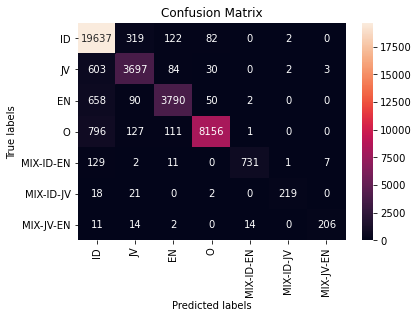


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.97      0.99      0.98     47575
          JV       0.93      0.94      0.93     10189
          EN       0.98      0.96      0.97     11479
           O       1.00      0.97      0.98     21508
   MIX-ID-EN       0.99      0.96      0.98      2091
   MIX-ID-JV       1.00      0.90      0.95       656
   MIX-JV-EN       0.97      0.94      0.95       541

    accuracy                           0.97     94039
   macro avg       0.98      0.95      0.96     94039
weighted avg       0.97      0.97      0.97     94039



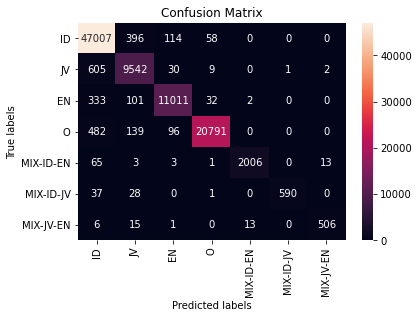


Top likely transitions:
O          -> O          3.85115
ID         -> O          2.91655
EN         -> O          2.82434
JV         -> O          2.56184
MIX-ID-EN  -> O          2.25352
MIX-JV-EN  -> O          2.23415
MIX-ID-JV  -> O          1.82463
EN         -> EN         1.57690
JV         -> JV         1.25408
ID         -> ID         0.68898
O          -> EN         0.63420
O          -> ID         0.63101
O          -> JV         0.51121
MIX-JV-EN  -> JV         0.46265
MIX-ID-JV  -> JV         0.27367
JV         -> MIX-JV-EN  0.25942
ID         -> MIX-ID-EN  0.06660
JV         -> MIX-ID-JV  0.05493
ID         -> EN         -0.02795
O          -> MIX-ID-EN  -0.08314

Top unlikely transitions:
MIX-ID-JV  -> MIX-JV-EN  -0.77853
MIX-ID-JV  -> ID         -0.83190
JV         -> EN         -0.86340
O          -> MIX-JV-EN  -0.90052
EN         -> JV         -0.95454
MIX-JV-EN  -> MIX-ID-JV  -1.00692
MIX-JV-EN  -> EN         -1.04879
ID         -> JV         -1.13820
JV         -> 

In [3]:
dataset = read_tsv('../dataset/all-merged-data-140422.tsv')
langid.train_test_result(data=dataset, test_size=0.3, n_label=7, model_name='mod_090422_no_ne.pkl')

In [4]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)